In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
sns.set_style('white')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

print(df.head())

print(df.cntry.unique())

  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH   5.0     6    3.0      3.0     10.0     5.0    8.0      5.0     4.0   
1    CH  25.0     6    6.0      5.0      7.0     5.0    9.0      3.0     2.0   
2    CH  26.0     6    1.0      8.0      8.0     8.0    7.0      6.0     3.0   
3    CH  28.0     6    4.0      6.0      6.0     7.0   10.0      6.0     2.0   
4    CH  29.0     6    5.0      6.0      7.0     5.0    8.0      7.0     2.0   

   gndr  agea  partner  
0   2.0  60.0      1.0  
1   2.0  59.0      1.0  
2   1.0  24.0      2.0  
3   2.0  64.0      1.0  
4   2.0  55.0      1.0  
['CH' 'CZ' 'DE' 'ES' 'NO' 'SE']


In [6]:
features = pd.get_dummies(df['cntry'])

features['Nordic'] = np.where((df['cntry'].isin(['NO', 'SE'])), 1, 0)

print(pd.crosstab(features['Nordic'], df['cntry']))

cntry     CH    CZ  DE    ES    NO    SE
Nordic                                  
0       1546  1316  28  2426     0     0
1          0     0   0     0  1462  1816


In [7]:
features['Adult_65plus'] = np.where(df['agea']>=65, 1, 0)

print(df['agea'].groupby(features['Adult_65plus']).describe())

               count       mean        std   min   25%   50%   75%    max
Adult_65plus                                                             
0             6682.0  40.874738  13.958596  15.0  29.0  42.0  53.0   64.0
1             1673.0  73.815302   6.650086  65.0  69.0  72.0  78.0  114.0


In [9]:
# Combining highly correlated variables with PCA(Principal Component Analysis)

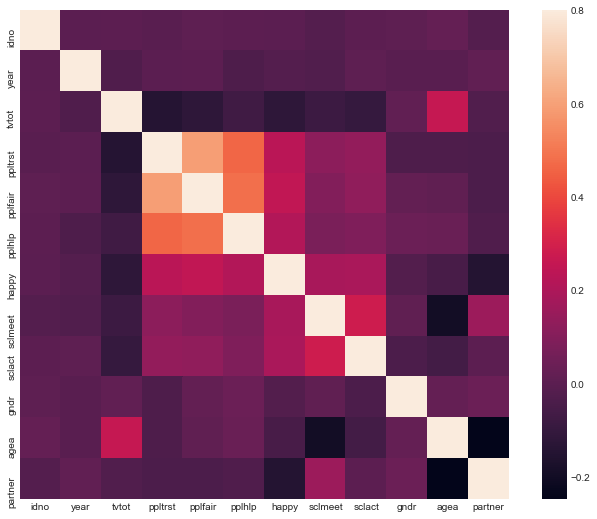

In [11]:
corrmat = df.corr()

f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [14]:
means = df[['ppltrst', 'pplfair', 'pplhlp']].mean(axis=0)
stds = df[['ppltrst', 'pplfair', 'pplhlp']].std(axis=0)
features['trust_fair_help'] = ((df[['ppltrst', 'pplfair', 'pplhlp']] - means) / stds).mean(axis=1)

plotdf = df.loc[:, ['ppltrst', 'pplfair', 'pplhlp']]
plotdf['trust_fair_help'] = features['trust_fair_help']
corrmat2 = plotdf.corr()

print(corrmat2)

                  ppltrst   pplfair    pplhlp  trust_fair_help
ppltrst          1.000000  0.592001  0.462562         0.834209
pplfair          0.592001  1.000000  0.480918         0.841674
pplhlp           0.462562  0.480918  1.000000         0.789318
trust_fair_help  0.834209  0.841674  0.789318         1.000000


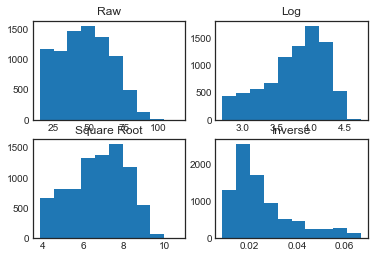

In [15]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['agea'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['agea'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['agea'].dropna()))
plt.title('Square Root')

ax3=fig.add_subplot(224)
plt.hist(1/df['agea'].dropna())
plt.title('Inverse')
plt.show()



features['log_age'] = np.log(df['agea'])

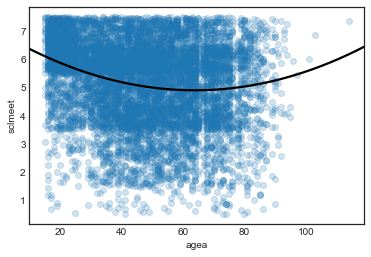

In [17]:
sns.regplot(
    df['agea'],
    y=df['sclmeet'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.2},
    line_kws={'color':'black'},
    ci=None
)

plt.show()

features['age_squared'] = df['agea'] * df['agea']

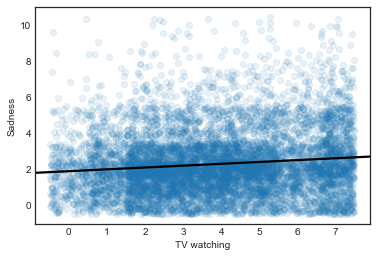

In [19]:
features['Sadness'] = max(df['happy']) - df['happy']

sns.regplot(
    df['tvtot'],
    features['Sadness'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.1},
    line_kws={'color':'black'},
    ci=None
)

plt.xlabel('TV watching')
plt.ylabel('Sadness')
plt.show()

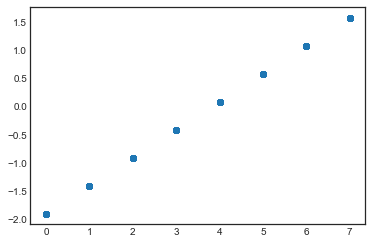

               idno          year         tvtot       ppltrst       pplfair  \
count  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03   
mean  -6.977221e-18 -5.302688e-16 -5.930638e-17 -8.372665e-17  1.814077e-16   
std    1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00   
min   -6.364414e-02 -1.000614e+00 -1.900914e+00 -2.516209e+00 -2.832624e+00   
25%   -6.196385e-02 -1.000614e+00 -9.053021e-01 -7.108364e-01 -4.741304e-01   
50%   -6.087847e-02  9.993865e-01  9.031023e-02  1.918499e-01 -2.431735e-03   
75%   -5.925039e-02  9.993865e-01  5.881164e-01  6.431931e-01  9.409657e-01   
max    1.734276e+01  9.993865e-01  1.583729e+00  1.997223e+00  1.884363e+00   

             pplhlp         happy       sclmeet        sclact          gndr  \
count  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03   
mean  -9.768109e-17  2.372255e-16 -1.116355e-16 -2.581572e-16  1.186128e-16   
std    1.000061e+00  1.000061e+00  1.000061e+00  1.

In [21]:
from sklearn import preprocessing

df_num = df.select_dtypes(include=[np.number]).dropna()

names=df_num.columns


df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

plt.scatter(df_num['tvtot'], df_scaled['tvtot'])
plt.show()

print(df_scaled.describe())

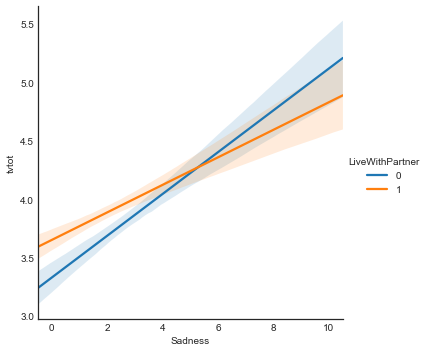

In [22]:
features['LiveWithPartner'] = np.where(df['partner'] == 1, 1, 0)

features['Sad_Partner'] = features['Sadness'] * features['LiveWithPartner']

features['tvtot'] = df['tvtot']
sns.lmplot(
    x='Sadness',
    y='tvtot',
    hue='LiveWithPartner',
    data=features,
    scatter=False
)
plt.show()